In [2]:
from resolution_analyzer import UNResolutionAnalyzer

In [3]:
analyzer = UNResolutionAnalyzer(config_path='config/data_sources.yaml')

INFO - Logging setup complete.
INFO - Initializing UNResolutionAnalyzer
INFO - Local data not found or incomplete, fetching and processing data.


e:\ETH\UN\policy-pulse\notebooks\guo\resolution_analyzer.py:189: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ga = pd.read_csv(ga_url)


INFO - Expanded subjects from 443 to 255 rows.
INFO - Downloaded thesaurus file successfully
INFO - Extracted 7341 subjects/schemes:
INFO -   - Concepts: 7322
INFO -   - Schemes: 19
INFO - Mapping Results:
INFO -   Total rows: 5856
INFO -   Matched: 3390 (57.9%)
INFO -   Unmatched: 2466 (42.1%)
INFO - 
Sample unmatched subjects:
INFO -   - 'nan'
INFO -   - 'UN. ECONOMIC AND SOCIAL COUNCIL'
INFO -   - 'REVIEW CONFERENCE OF THE PARTIES TO THE TREATY ON THE NON-PROLIFERATION OF NUCLEAR WEAPONS (3RD : 1985 : GENEVA)'
INFO -   - 'NUCLEAR WEAPON FREEZE'
INFO -   - 'NEW INTERNATIONAL ECONOMIC ORDER'
INFO -   - 'PEACE AND SECURITY'
INFO -   - 'UNITAR'
INFO -   - 'UN'
INFO -   - 'LEAGUE OF ARAB STATES'
INFO -   - 'RIGHT OF PEOPLES TO PEACE'
INFO - Normalization Results:
INFO - 
Resolutions Table:
INFO -   Total resolutions: 5534
INFO -   Columns: undl_id, date, session, resolution, draft, committee_report, meeting, title, agenda_title, total_yes, total_no, total_abstentions, total_non_voting, t

In [25]:
# 3. Query by date range
date_filtered = analyzer.query(start_date='1996-01-01', end_date='2005-12-31')
# date_filtered = analyzer.query(start_date='2006-01-01', end_date='2015-12-31')
# date_filtered = analyzer.query(start_date='2016-01-01', end_date='2025-12-31')
print(f"Resolutions from 2000-2010: {len(date_filtered)}")

INFO - 
Final result: 719 resolutions
Resolutions from 2000-2010: 719


In [26]:
# print(date_filtered.head())
print("date_filtered.shape[0]: ", date_filtered.shape[0])
# Concatenate 'title' and 'agenda_title', remove duplicates, and show results

# First, fill NaNs with empty string to prevent errors during concatenation
date_filtered['combined_title'] = date_filtered['title'].fillna('') + ' ' + date_filtered['agenda_title'].fillna('')

# Strip leading/trailing whitespace in the new column
date_filtered['combined_title'] = date_filtered['combined_title'].str.strip()

# Remove repetitive/duplicate combined titles, keeping only the first occurrence
unique_titles = date_filtered.drop_duplicates(subset=['combined_title'])

# Display result (show first few unique combined titles)
print(unique_titles['combined_title'].head())
print("unique_titles.shape[0]: ", unique_titles.shape[0])


date_filtered.shape[0]:  719
1435    The situation in the Middle East : resolution ...
1436    Financing of the United Nations Interim Force ...
1437    Report of the International Atomic Energy Agen...
1438    Zone of peace and cooperation of the South Atl...
1439    Necessity of ending the economic, commercial a...
Name: combined_title, dtype: object
unique_titles.shape[0]:  311


east: 40
middle: 11
financing: 3
force: 2
lebanon: 2
interim: 2
energy: 1
atomic: 1
agency: 14
atlantic: 2
south: 4
peace: 7
zone: 4
cooperation: 13
commercial: 2
financial: 3
embargo: 2
america: 2
cuba: 3
necessity: 2
economic: 17
comprehensive: 10
test: 4
ban: 5
nuclear: 50
coercive: 6
political: 6
measures: 13
elimination: 18
compulsion: 3
means: 9
inalienable: 3
palestinian: 44
palestine: 28
rights: 93
people: 34
exercise: 7
division: 1
secretariat: 5
public: 5
department: 4
peaceful: 2
settlement: 3
jerusalem: 33
golan: 16
syrian: 16
process: 1
sea: 5
law: 6
security: 10
science: 3
role: 8
context: 6
technology: 4
disarmament: 66
fields: 1
related: 7
asia: 1
weapon: 15
free: 12
threat: 8
effective: 44
non: 27
use: 24
arrangements: 4
weapons: 27
assure: 3
prevention: 4
space: 3
race: 3
outer: 3
arms: 17
preparatory: 4
complete: 52
proliferation: 12
parties: 4
review: 12
hemisphere: 4
southern: 5
areas: 5
adjacent: 5
devoted: 1
convening: 1
control: 9
agreements: 6
drafting: 4
envir

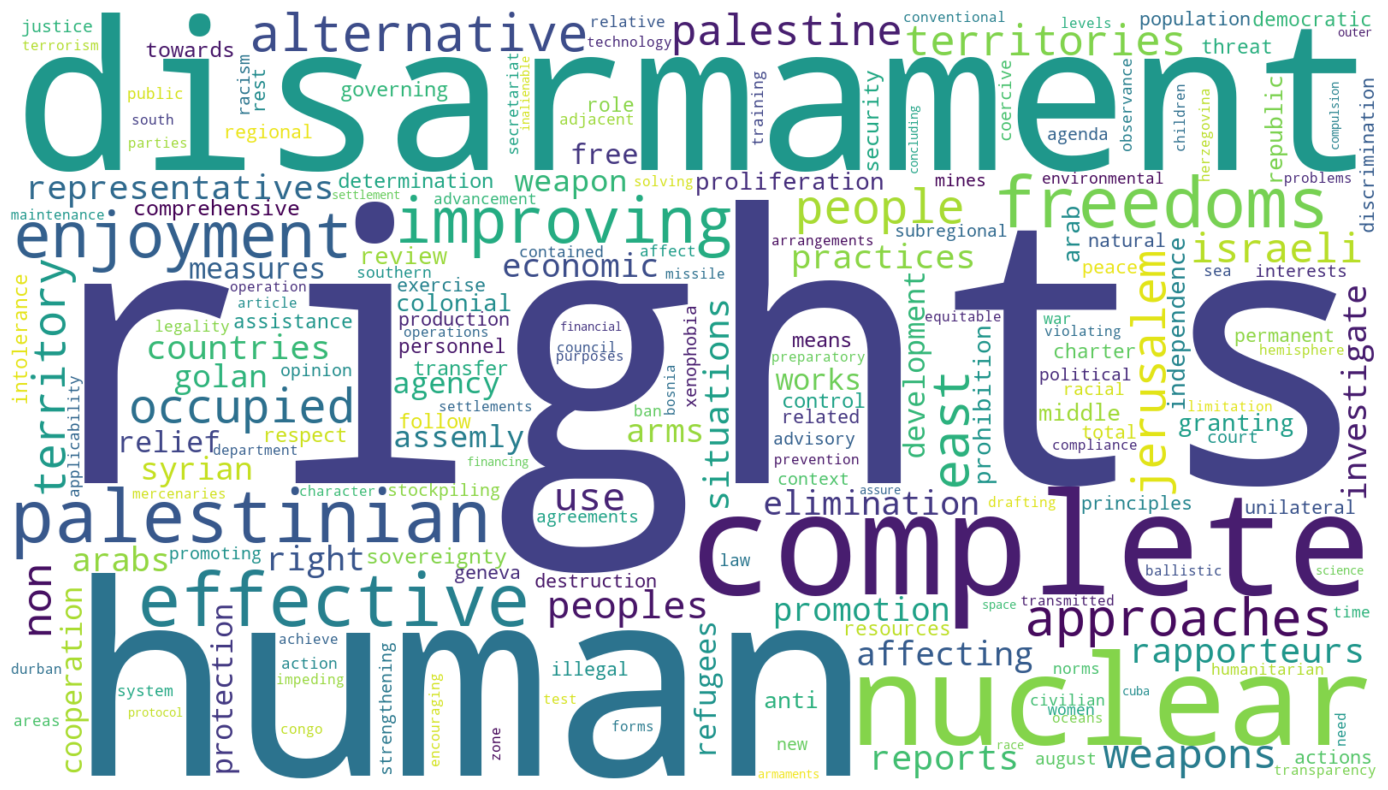

Saved resolution word-appearance cloud to: viz\ga_title_wordcloud_unique_titles.png
Top 20 words by number of unique resolutions they appear in:
rights: 93
human: 86
disarmament: 66
complete: 52
nuclear: 50
palestinian: 44
effective: 44
freedoms: 41
enjoyment: 41
improving: 41
approaches: 41
alternative: 41
east: 40
people: 34
occupied: 34
jerusalem: 33
territory: 30
palestine: 28
territories: 28
non: 27


In [27]:
# Analysis: Count unique resolutions where each word appears (not total word occurrences),
# using `unique_titles` from the previous cell (a DataFrame of unique combined titles).
import re
from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Output image path
from pathlib import Path
out_img = Path("viz/ga_title_wordcloud_unique_titles.png")

# Stopwords and tokenization
basic_stopwords = {
    "the","of","and","to","in","for","on","by","with","a","an","at","as","its","all",
    "this","that","these","those","from","under","into","about","against","over",
    "or","nor","but","so","yet","be","is","are","was","were","been","being","it",
    "their","his","her","them","they","we","you","i","he","she","which","who","whom",
    "what","when","where","why","how","also","including","concerning","regarding","relating",
    "resolution","resolutions","adopted","general","assembly","united","nations","report","session","meeting",
    "pv","rev","corr","add","part","question","situation","programme","program","draft","information",
    "activities","implementation","conclusion","conclusions","establishment","relationship","immediate","world","national","international",
    "special","committee","conference","treaty","convention","declaration","record",

    "region", "persons", "internally", "status", "implications", "area",
    "states", "imposed", "ending", "between", "self", "other", "questions", "fundamental",
    "near", "addressed"
    # Added more common but uninformative words from the counter output:
    # "development", "economic", "rights", "protection", "cooperation", "promotion",
    # "resources", "support", "progress", "measures", "recommendation", "measuring",
    # "review", "activities", "assistance", "strengthening", "implementation", "issues",
    # "future", "social", "planning", "prevention", "needs", "provisions", "advance",
    # "main", "reporting", "preliminary", "comprehensive", "questions", "fundamental",
    # "use", "follow", "situations"
}

word_re = re.compile(r"[a-z]{3,}")

def normalize(text: str) -> str:
    return (text or "").lower()

# No CSV: data comes from the unique_titles DataFrame, in the 'combined_title' column
# Optionally extract place words (like country names and participants) from unique_titles columns if available,
# but here we will not, since we have no explicit country columns.

# If you want to add known country/UN member words as place_words, you can expand below.
place_words = set()  # Optionally fill this if desired.

rows = [normalize(text) for text in unique_titles['combined_title'] if isinstance(text, str)]

# Now, for each unique combined title, collect unique words and count per-word resolution occurrence
word_in_resolutions = Counter()
for text in rows:
    tokens = set(
        t for t in word_re.findall(text)
        if t not in basic_stopwords and t not in place_words
    )
    for token in tokens:
        word_in_resolutions[token] += 1

for word, count in word_in_resolutions.items():
    print(f"{word}: {count}")

# Generate word cloud from resolution occurrence counts
wc = WordCloud(width=1600, height=900, background_color="white", colormap="viridis")
wc.generate_from_frequencies(word_in_resolutions)

plt.figure(figsize=(14, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

# Save image
wc.to_file(str(out_img))
print(f"Saved resolution word-appearance cloud to: {out_img}")

# Optionally print top N summary
print("Top 20 words by number of unique resolutions they appear in:")
for word, count in word_in_resolutions.most_common(20):
    print(f"{word}: {count}")
